In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from SI2 import ANFIS, FuzzyInputVariable_List_Trapezoids
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

## Data preparation

In [4]:
class Dataset:
    def __init__(self, X, Y, name) -> None:
        self.name = name
        self.__data = X
        self.__targets = Y
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = (None, None, None, None)
        
    def split(self, test_size =0.2, random_state =2137):
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = train_test_split(
                                                                            self.__data, 
                                                                            self.__targets, 
                                                                            test_size=test_size, 
                                                                            random_state=random_state, stratify=self.__targets)
    
    @property
    def trainX(self): return self.__x_train.T
    
    @property
    def trainY(self): return self.__y_train
    
    @property
    def testX(self): return self.__x_test.T
    
    @property
    def testY(self): return self.__y_test

In [5]:
from typing import Tuple

def generate_data_for_multiply(start, end, test_size=0.2, random_state=2137):

    x: np.ndarray = np.arange(start, end+0.1, 0.1)
    tup: Tuple[np.ndarray, np.ndarray] = np.meshgrid(x, x)
    x, y = tup
    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.round(dataX * dataY).astype(int)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataX, dataY, data_labels, c=data_labels, cmap='cividis')
    plt.show()
    data = Dataset(dataXY, data_labels, name=f"{end}x{end}")
    data.split(test_size, random_state)
    return data

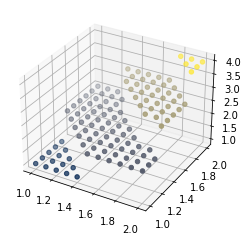

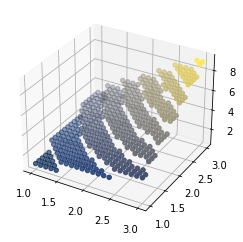

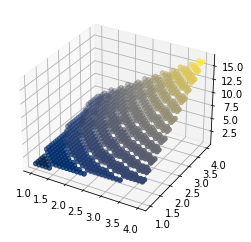

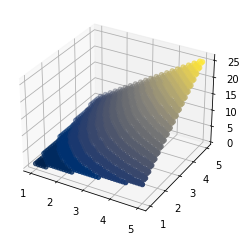

In [6]:
datasets = [generate_data_for_multiply(1, num) for num in range(2, 6)]

In [7]:
def create_vars(end):
    
    mf = [[num+1, 0.5, 0.5, 0.5] for num in range(end)]
    varX = FuzzyInputVariable_List_Trapezoids(mf, f"XAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    varY = FuzzyInputVariable_List_Trapezoids(mf, f"YAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    return [varX, varY]

variables = [create_vars(num) for num in range(2, 6)]

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.43899939 0.40375001 0.58456869]
 [0.92705994 0.59583226 0.10196266]
 [0.59522731 0.7517829  0.95549255]
 [0.86198326 0.12352838 0.20990153]]


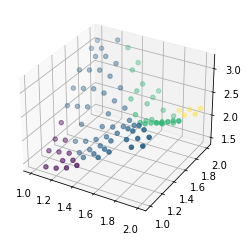

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.79356222 0.83561936 0.22486914]
 [0.55454871 0.14553371 0.57500617]
 [0.87753504 0.07911548 0.70960478]
 [0.0148586  0.62107155 0.48247202]
 [0.51454588 0.59949192 0.98222925]
 [0.72240637 0.88994045 0.73061294]
 [0.29123127 0.30393248 0.46370983]
 [0.77631527 0.78658038 0.94790729]
 [0.78945433 0.56886395 0.01519427]]


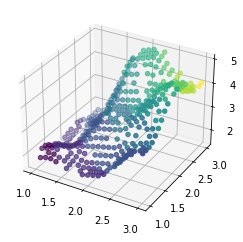

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.32530215 0.35629912 0.24742598]
 [0.20962709 0.16744355 0.28398466]
 [0.35937055 0.01010366 0.6015169 ]
 [0.55879216 0.66093825 0.38780249]
 [0.12487405 0.32700757 0.75301791]
 [0.04108115 0.95421647 0.97324188]
 [0.12241573 0.12291063 0.08218694]
 [0.47013112 0.22142226 0.81278876]
 [0.19695921 0.14824366 0.99166371]
 [0.1210015  0.7102168  0.57190454]
 [0.72485576 0.02404392 0.31919175]
 [0.97604137 0.0622752  0.46545392]
 [0.26878887 0.9889058  0.18766687]
 [0.26417168 0.19796371 0.21341799]
 [0.88488676 0.18166378 0.47160274]
 [0.67703621 0.05255201 0.11290148]]


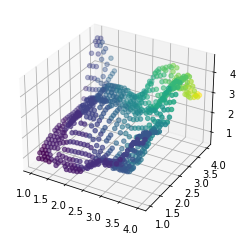

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.64155908 0.03076575 0.96057397]
 [0.54541947 0.09568793 0.69961915]
 [0.59544678 0.30913287 0.9767975 ]
 [0.52642358 0.51239231 0.42262252]
 [0.77243907 0.24184366 0.82766788]
 [0.46599418 0.86587492 0.19676513]
 [0.67800952 0.03600239 0.02813101]
 [0.02158427 0.81299609 0.12762583]
 [0.78631592 0.50726269 0.86284246]
 [0.47844895 0.24216476 0.32710527]
 [0.46558301 0.10116516 0.13163948]
 [0.01359896 0.08312167 0.46784553]
 [0.09986557 0.29683124 0.80931698]
 [0.61894002 0.82247527 0.52012441]
 [0.7587286  0.62737897 0.45606655]
 [0.42753134 0.47204461 0.42882254]
 [0.0558651  0.63264888 0.85395241]
 [0.81082037 0.2796966  0.42609967]
 [0.53919703 0.98400376 0.32196576]
 [0.50389129 0.98122211 0.2664377 ]
 [0.5964468  0.5472963  0.3

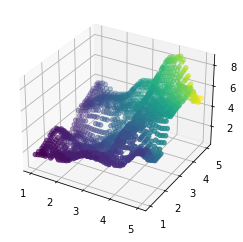

In [8]:
def create_anfis_instance(variables, dataset: Dataset):
    fis = ANFIS(variables, dataset.trainX, dataset.trainY)

    print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    fis.show_results(color=dataset.trainY)
    return fis
anfises = {dataset.name:create_anfis_instance(vs, dataset) for vs, dataset in zip(variables, datasets)}

In [10]:
import concurrent.futures as cf
from SI2 import utils
from typing import Dict

losses = {}
trained_anfises: Dict[str, ANFIS] = {}
if __name__ == "__main__":
    with cf.ProcessPoolExecutor(max_workers=5) as executor:
        _futures = [executor.submit(utils.train_using_ga, key, anfis, 2000, **{"num_of_individuals":64, "k":2, "selection":"tournament", "mutation":"sliceinv"}) for key, anfis in anfises.items()]
        for future in cf.as_completed(_futures):
            key, optim_result, model = future.result()
            losses[key] = optim_result.fun
            trained_anfises[key] = model
            

In [11]:
print(losses)

{'2x2': 20.30295581101288, '3x3': 85.78720518930623, '4x4': 200.13407276335664, '5x5': 549.4062179872888}


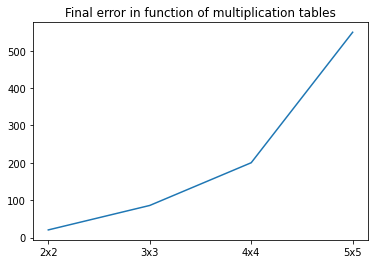

In [12]:
plt.plot(list(losses.values()))
plt.title("Final error in function of multiplication tables")
plt.xticks(np.arange(len(losses.values())), list(losses.keys()))
plt.show()

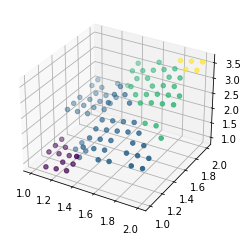

ACCURACY: 0.8229166666666666


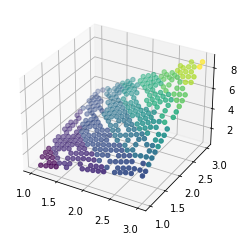

ACCURACY: 0.9375


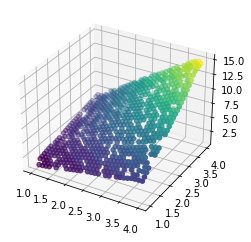

ACCURACY: 0.91796875


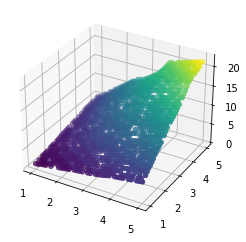

ACCURACY: 0.7433035714285714


In [13]:
for dataset, anfis in zip(datasets, list(trained_anfises.values())):
    anfis.show_results(dataset.trainY)
    y_pred = anfis.anfis_estimate_labels(anfis.premises, anfis.op, anfis.tsk)
    y_pred = list(map(round, y_pred.flatten()))
    print(f"ACCURACY: {accuracy_score(dataset.trainY, y_pred)}")

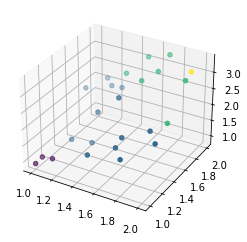

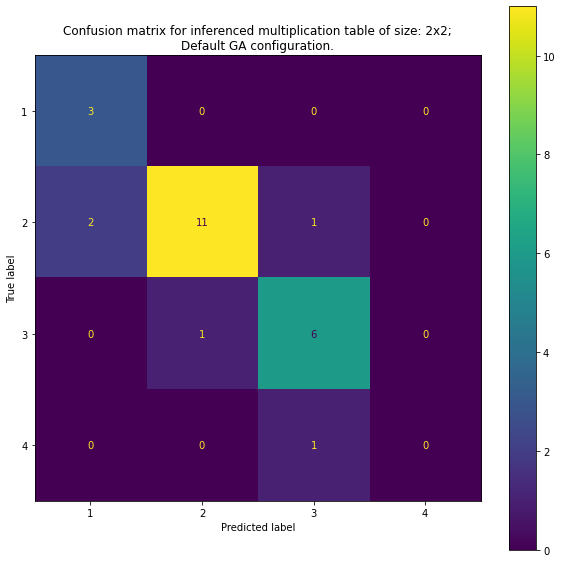

ACCURACY: 0.8


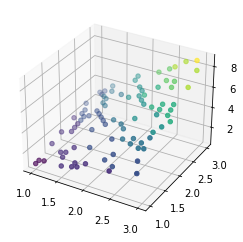

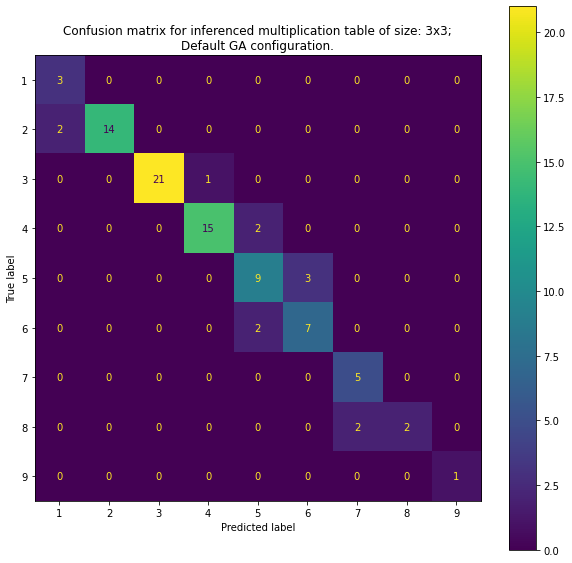

ACCURACY: 0.8651685393258427


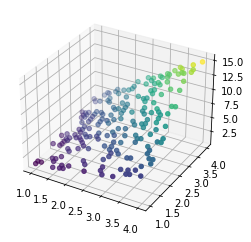

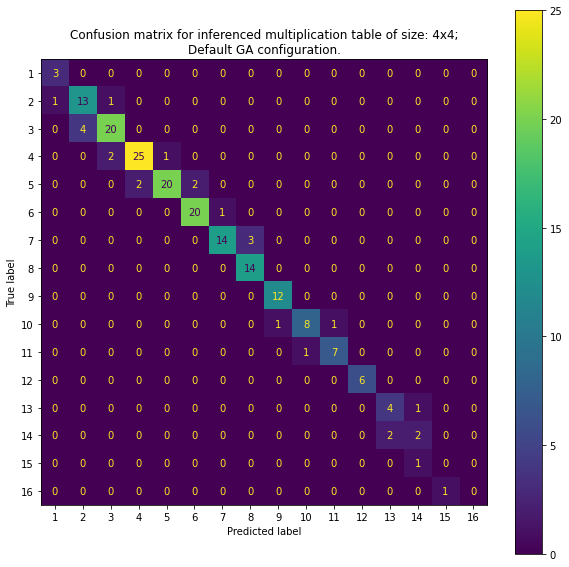

ACCURACY: 0.8704663212435233


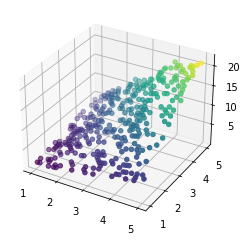

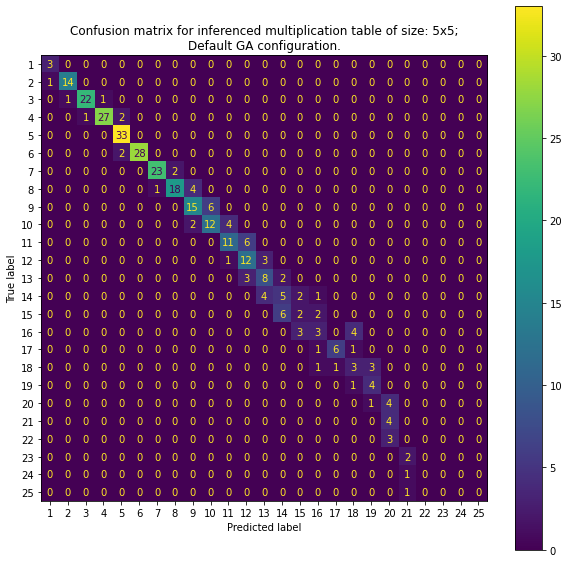

ACCURACY: 0.7507418397626113


In [14]:

for fis, key, dataset in zip(list(trained_anfises.values()), list(trained_anfises.keys()), datasets):
    fis.training_data = dataset.testX
    fis.expected_labels = dataset.testY
    fis.show_results(dataset.testY)  

    y_pred = fis.anfis_estimate_labels(fis.premises, fis.op, fis.tsk)
    y_pred = list(map(round, y_pred.flatten()))
    conf = confusion_matrix(dataset.testY, y_pred)
    disp = ConfusionMatrixDisplay(conf, display_labels=set(dataset.testY))
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax)
    plt.title(f"Confusion matrix for inferenced multiplication table of size: {key};\nDefault GA configuration.")
    plt.show()
    print(f"ACCURACY: {accuracy_score(dataset.testY, y_pred)}")